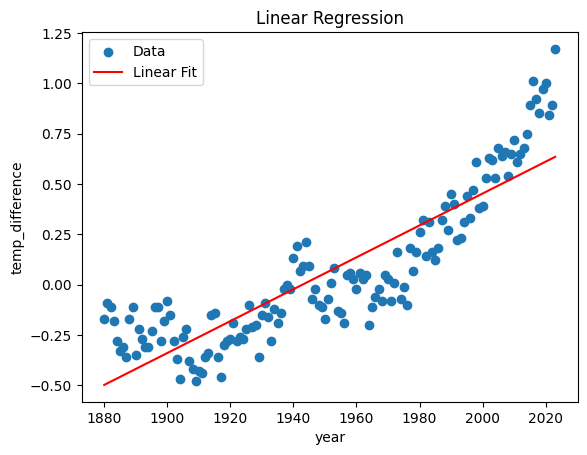

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("/content/temp_nasa_till_2023.csv")
X = data['year'].values.reshape(-1, 1)
y = data['temp_difference'].values

linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = linear_model.predict(X)
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Linear Fit")
plt.legend()
plt.xlabel("year")
plt.ylabel("temp_difference")
plt.title("Linear Regression")
plt.show()


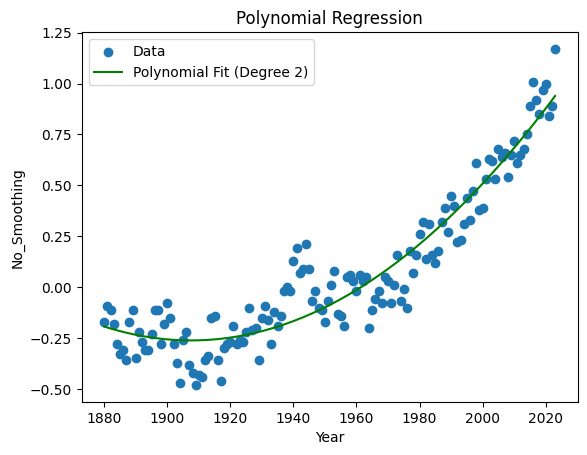

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

y_poly_pred = poly_model.predict(X_poly)
plt.scatter(X, y, label="Data")
plt.plot(X, y_poly_pred, color='green', label="Polynomial Fit (Degree 2)")
plt.legend()
plt.xlabel("Year")
plt.ylabel("No_Smoothing")
plt.title("Polynomial Regression")
plt.show()


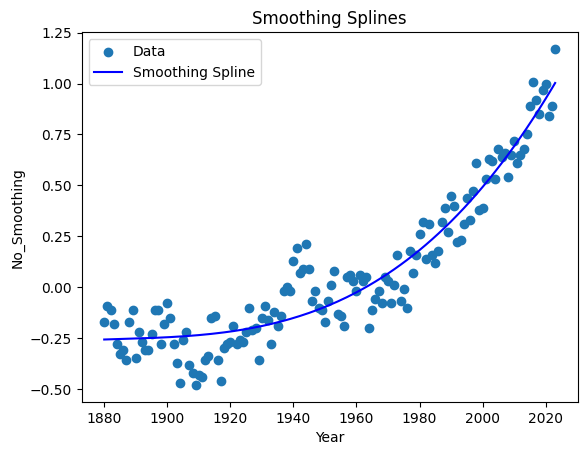

In [49]:
from scipy.interpolate import UnivariateSpline

spline = UnivariateSpline(X.flatten(), y, s=5)
y_spline_pred = spline(X.flatten())

plt.scatter(X, y, label="Data")
plt.plot(X, y_spline_pred, color='blue', label="Smoothing Spline")
plt.legend()
plt.xlabel("Year")
plt.ylabel("No_Smoothing")
plt.title("Smoothing Splines")
plt.show()


In [50]:
!pip install pygam

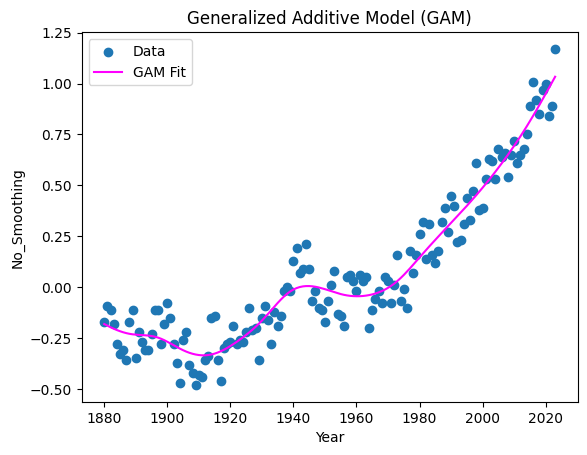

In [51]:
from pygam import LinearGAM

gam = LinearGAM().fit(X, y)

y_gam_pred = gam.predict(X)
plt.scatter(X, y, label="Data")
plt.plot(X, y_gam_pred, color='magenta', label="GAM Fit")
plt.legend()
plt.xlabel("Year")
plt.ylabel("No_Smoothing")
plt.title("Generalized Additive Model (GAM)")
plt.show()


In [52]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from scipy.interpolate import UnivariateSpline
from pygam import LinearGAM

data = pd.read_csv("/content/temp_nasa_till_2023.csv")
X = data['year'].values.reshape(-1, 1)
y = data['temp_difference'].values

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)
r2_poly = r2_score(y, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y, y_poly_pred))

spline = UnivariateSpline(X.flatten(), y, s=5)
y_spline_pred = spline(X.flatten())
r2_spline = r2_score(y, y_spline_pred)
rmse_spline = np.sqrt(mean_squared_error(y, y_spline_pred))

gam = LinearGAM().fit(X, y)
y_gam_pred = gam.predict(X)
r2_gam = r2_score(y, y_gam_pred)
rmse_gam = np.sqrt(mean_squared_error(y, y_gam_pred))

print(f"Polynomial Fit (Degree 2): R^2 = {r2_poly:.4f}, RMSE = {rmse_poly:.4f}")
print(f"Smoothing Spline: R^2 = {r2_spline:.4f}, RMSE = {rmse_spline:.4f}")
print(f"GAM Fit: R^2 = {r2_gam:.4f}, RMSE = {rmse_gam:.4f}")


Polynomial Fit (Degree 2): R^2 = 0.9021, RMSE = 0.1177
Smoothing Spline: R^2 = 0.9065, RMSE = 0.1150
GAM Fit: R^2 = 0.9374, RMSE = 0.0941


In [55]:
import numpy as np
import pandas as pd

future_years = np.arange(2024, 2101).reshape(-1, 1)

future_predictions = gam.predict(future_years)

future_data = pd.DataFrame({
    "year": future_years.flatten(),
    "temp_difference": future_predictions
})

print(future_data)

    year  temp_difference
0   2024         1.061662
1   2025         1.089922
2   2026         1.118182
3   2027         1.146442
4   2028         1.174701
..   ...              ...
72  2096         3.096378
73  2097         3.124638
74  2098         3.152898
75  2099         3.181158
76  2100         3.209418

[77 rows x 2 columns]


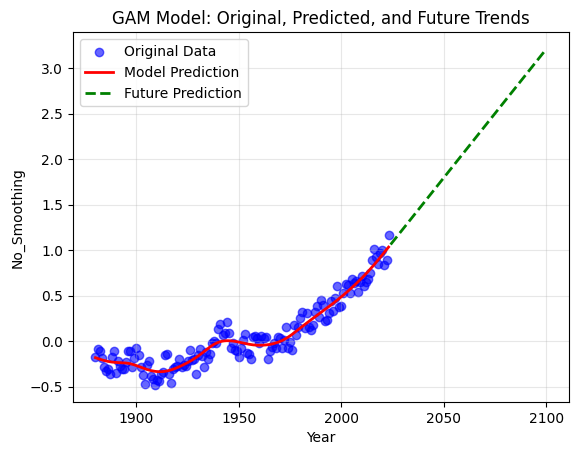

In [54]:
import matplotlib.pyplot as plt

future_years = np.arange(2024, 2101).reshape(-1, 1)
future_predictions = gam.predict(future_years)

plt.scatter(data['year'], data['temp_difference'], label="Original Data", color='blue', alpha=0.6)

plt.plot(data['year'], gam.predict(data['year'].values.reshape(-1, 1)),
         label="Model Prediction", color='red', linewidth=2)

plt.plot(future_years, future_predictions, label="Future Prediction", color='green', linestyle='--', linewidth=2)

plt.xlabel("Year")
plt.ylabel("No_Smoothing")
plt.title("GAM Model: Original, Predicted, and Future Trends")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [57]:
combined_data = pd.concat([
    data,future_data
], ignore_index=True)

combined_data

,year,temp_difference
0,1880,-0.170000
1,1881,-0.090000
2,1882,-0.110000
3,1883,-0.180000
4,1884,-0.280000
...,...,...
216,2096,3.096378
217,2097,3.124638
218,2098,3.152898
219,2099,3.181158


In [58]:
combined_data.to_csv('temp_nasa_till_2100.csv', index=False)